In [336]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import RocCurveDisplay, confusion_matrix

sns.set(rc={'figure.figsize':(11,8)}) 
sns.set_style('whitegrid')

In [337]:
with open('ProSPECCTs results/NMR_structures.pickle', 'rb') as f:
    dataset = pickle.load(f)

df = pd.DataFrame.from_dict(dataset) #, orient='index')
df

,score,rot,trans,mapping,label,ligand_dist
0,99.996151,"[[0.99999994, -1.2258374e-08, -1.7135207e-08],...","[-4.7683716e-07, 0.0, 0.0]","{11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 1...",positive,5.364935e-07
1,8.057612,"[[0.99995893, 0.0024323736, -0.008731755], [-0...","[0.08211708, -0.012483597, -0.005420685]","{11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 1...",positive,1.686741e-01
2,1.104275,"[[0.29291338, -0.07243383, 0.9533913], [-0.903...","[-0.020357132, 0.35813057, 0.5498533]","{11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 1...",positive,9.913449e-01
3,0.939252,"[[0.8749262, -0.17683715, 0.45081344], [0.2750...","[0.022798061, -0.0042824745, 0.40366757]","{4: 4, 5: 5, 6: 6, 11: 11, 12: 12, 13: 13, 14:...",positive,6.563978e-01
4,0.853120,"[[-0.50544244, 0.8555256, -0.11226746], [0.857...","[0.2938366, -0.6723622, -0.4411173]","{11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 1...",positive,1.100106e+00
...,...,...,...,...,...,...
108236,-1.000000,NaN,NaN,NaN,negative,NaN
108237,-1.000000,NaN,NaN,NaN,negative,NaN
108238,-1.000000,NaN,NaN,NaN,negative,NaN
108239,-1.000000,NaN,NaN,NaN,negative,NaN


In [338]:
print(f"Found correct: {df[(df.label == 'positive') & (df.ligand_dist < 1)].count()} out of {sum(df.label == 'positive')}")

Found correct: score          5724
rot            5724
trans          5724
mapping        5724
label          5724
ligand_dist    5724
dtype: int64 out of 7729


In [339]:
print("Incorrect:", df[df.label == 'negative'].score.quantile(.9486))

Incorrect: -1.0


In [340]:
print("Median true ligand dist:", df[df.label == 'positive'].ligand_dist.median())

Median true ligand dist: 0.5852417945861816


<Axes: xlabel='score', ylabel='ligand_dist'>

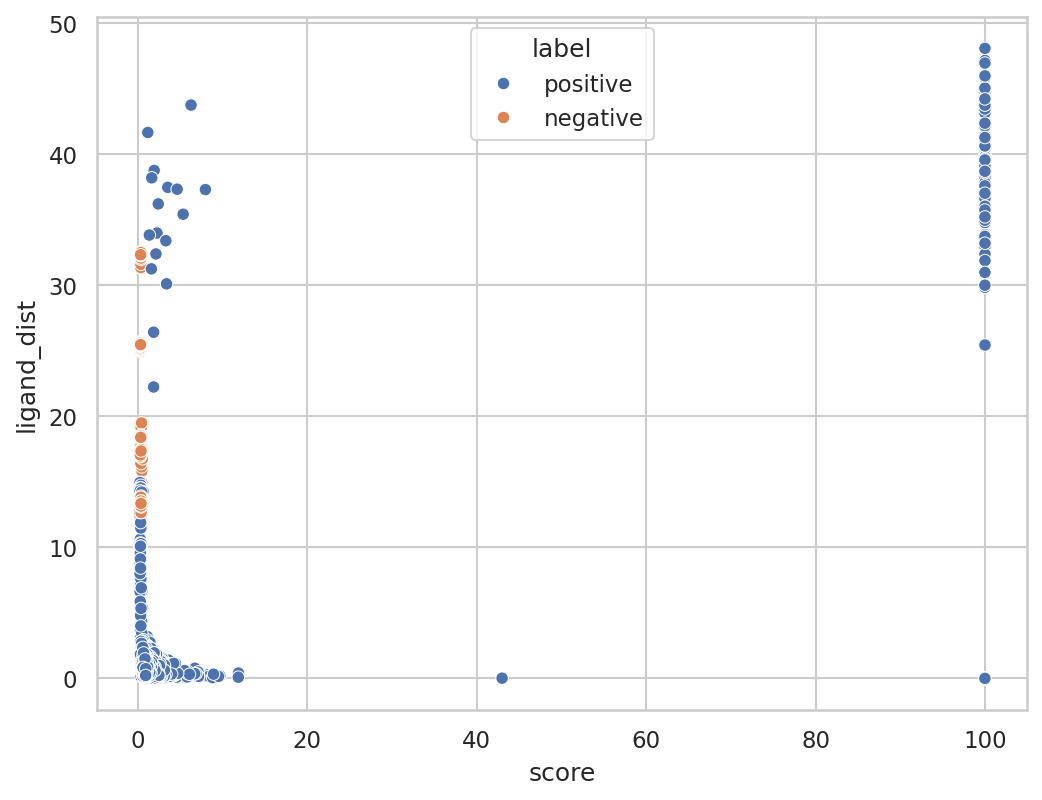

In [341]:
plt.figure(figsize=(8, 6), dpi=150)
sns.scatterplot(df[df.score < 100], x='score', y='ligand_dist', hue='label')

Text(0.5, 0, 'Distance of the Ligands After Superposition')

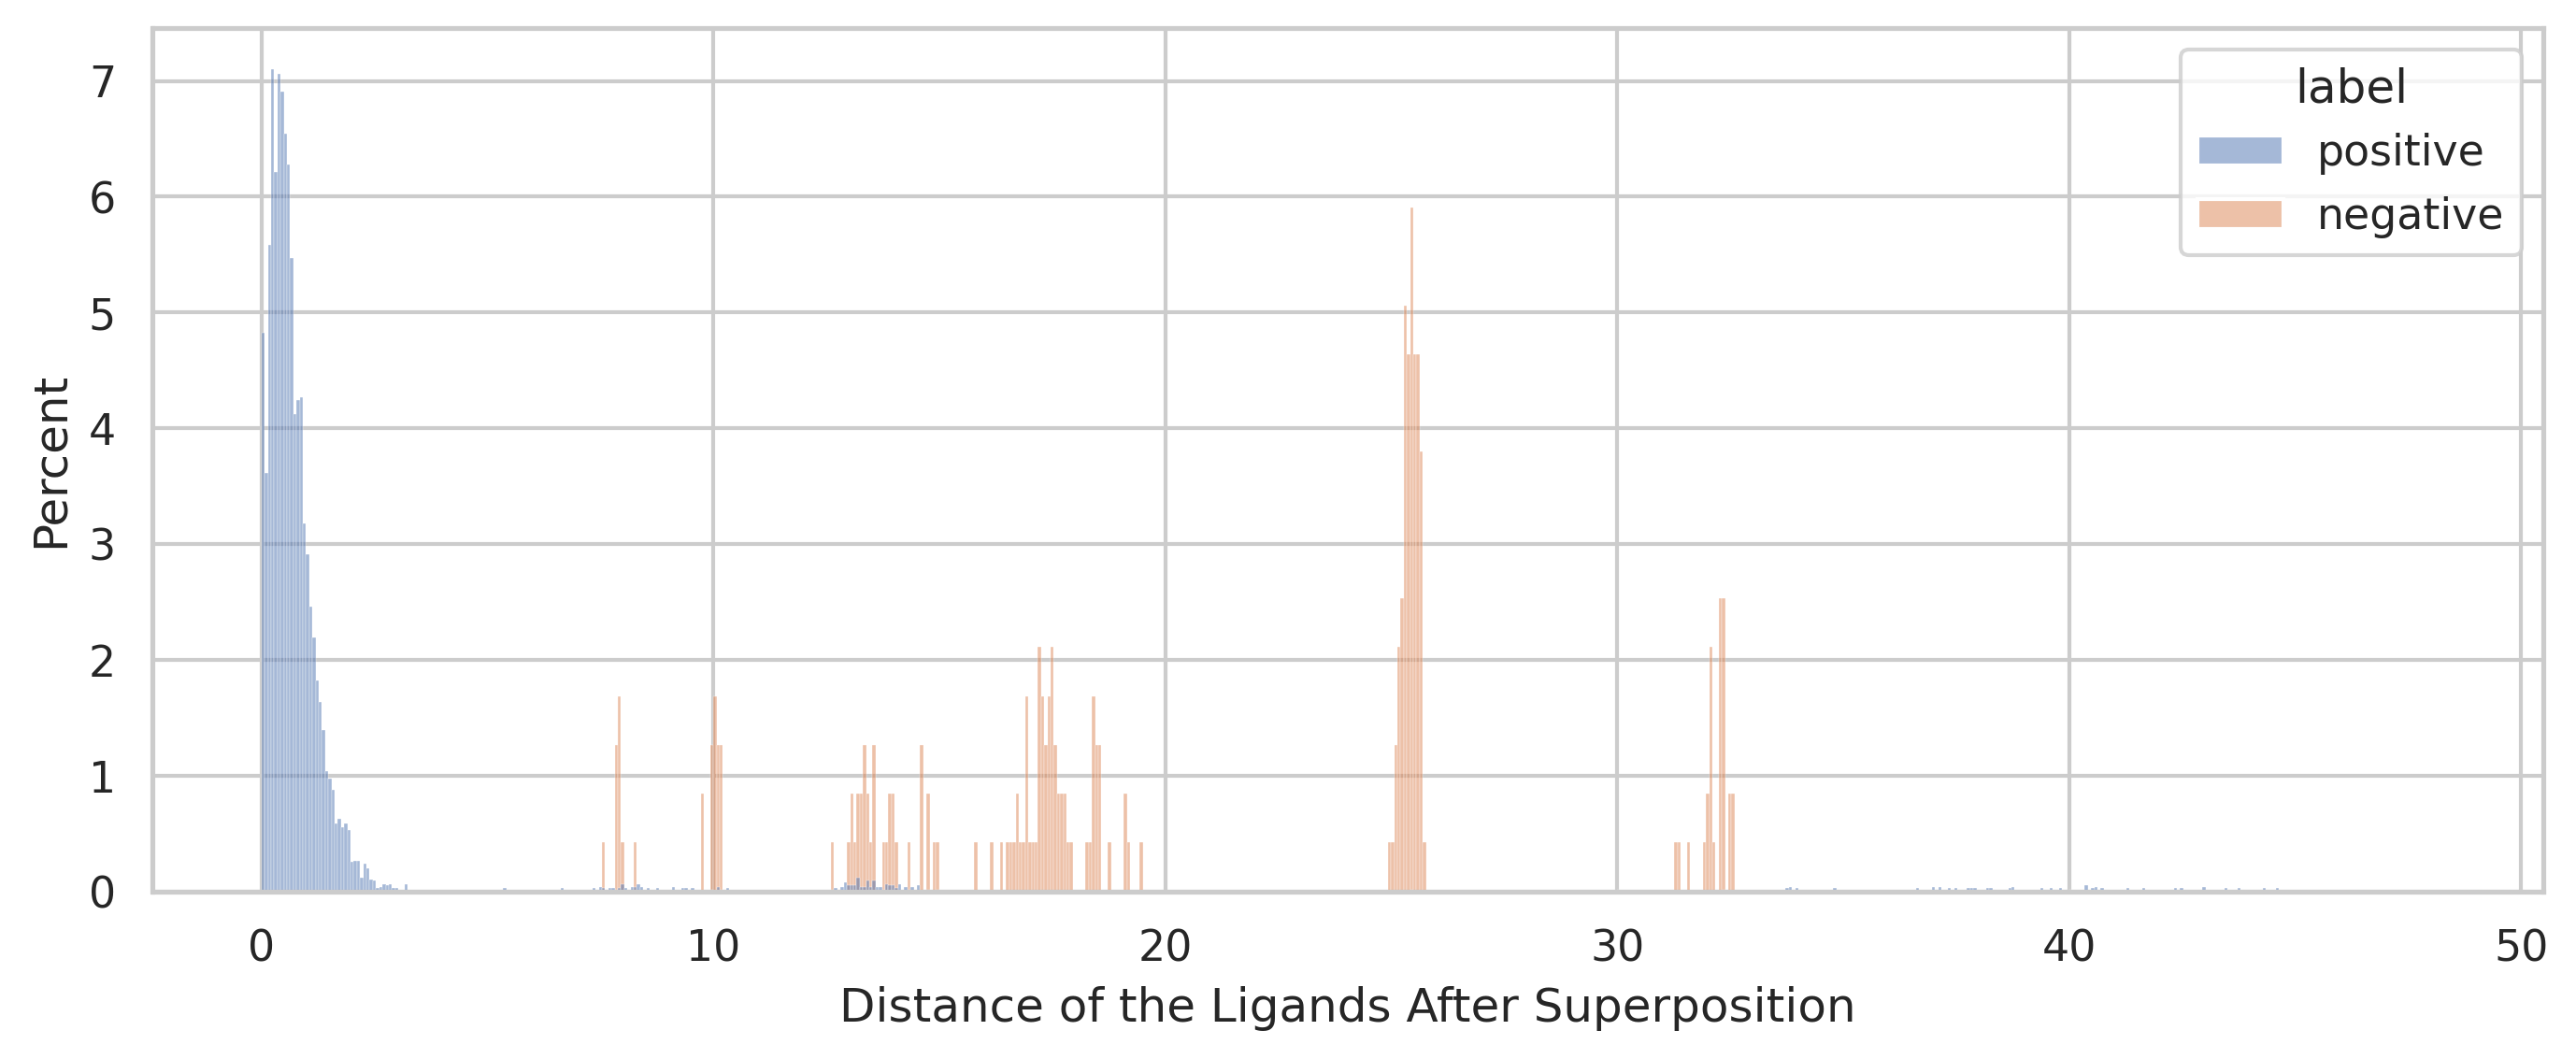

In [342]:
plt.figure(figsize=(11, 4), dpi=300)
sns.histplot(df, x='ligand_dist', hue='label', stat='percent', common_norm=False)
plt.xlabel('Distance of the Ligands After Superposition')

<Axes: xlabel='score', ylabel='Percent'>

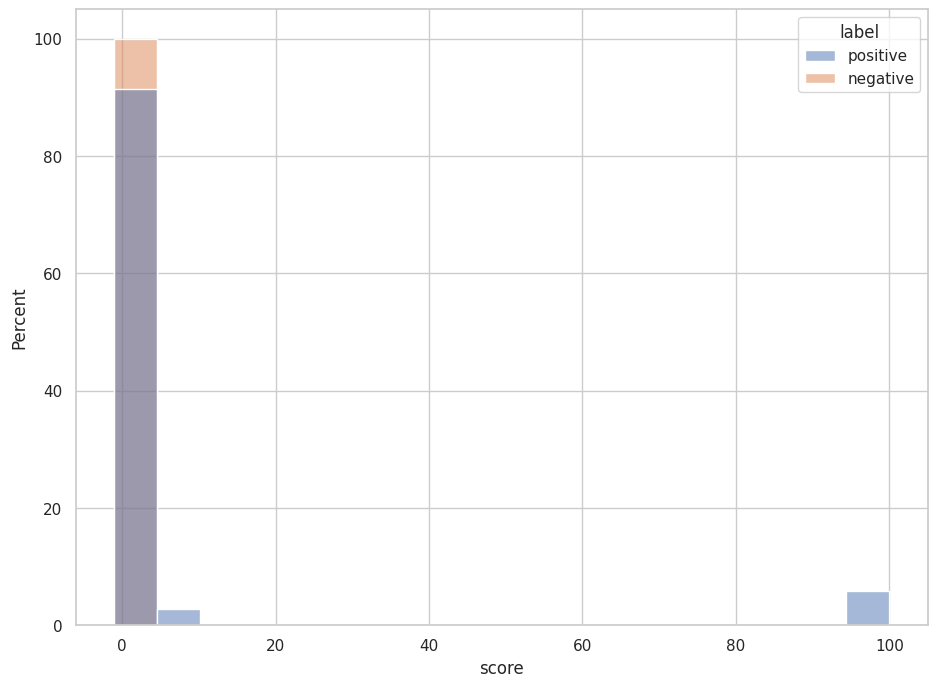

In [343]:
sns.histplot(df, x='score', hue='label', stat='percent', common_norm=False)

<Axes: xlabel='score', ylabel='Percent'>

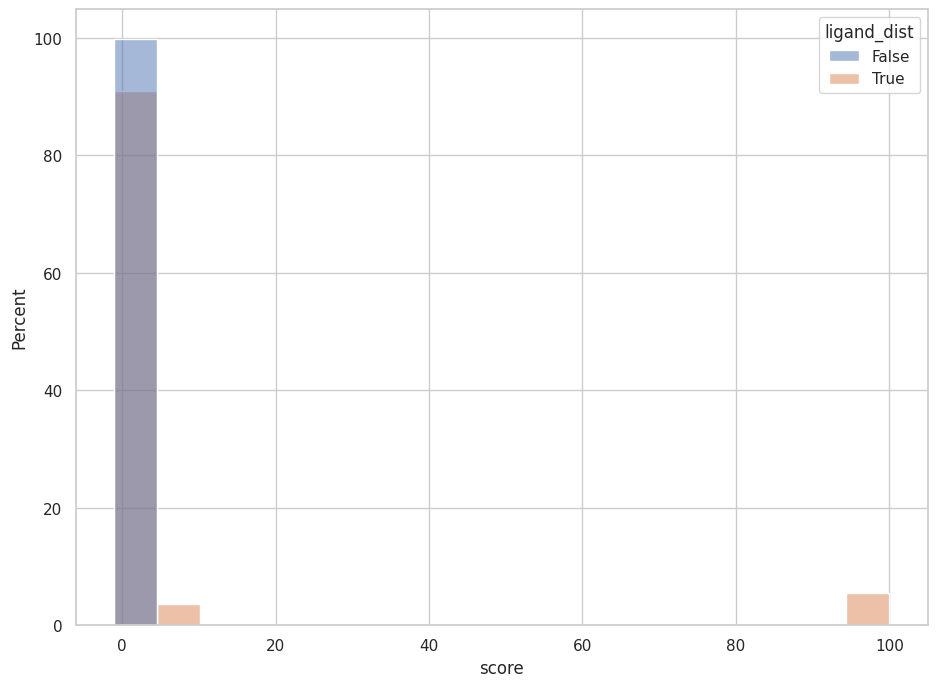

In [344]:
sns.histplot(df[df.score < 100], x='score', hue=df.ligand_dist < 1, stat='percent', common_norm=False)


Positive results: 7189


Text(0, 0.5, 'True Positive Rate')

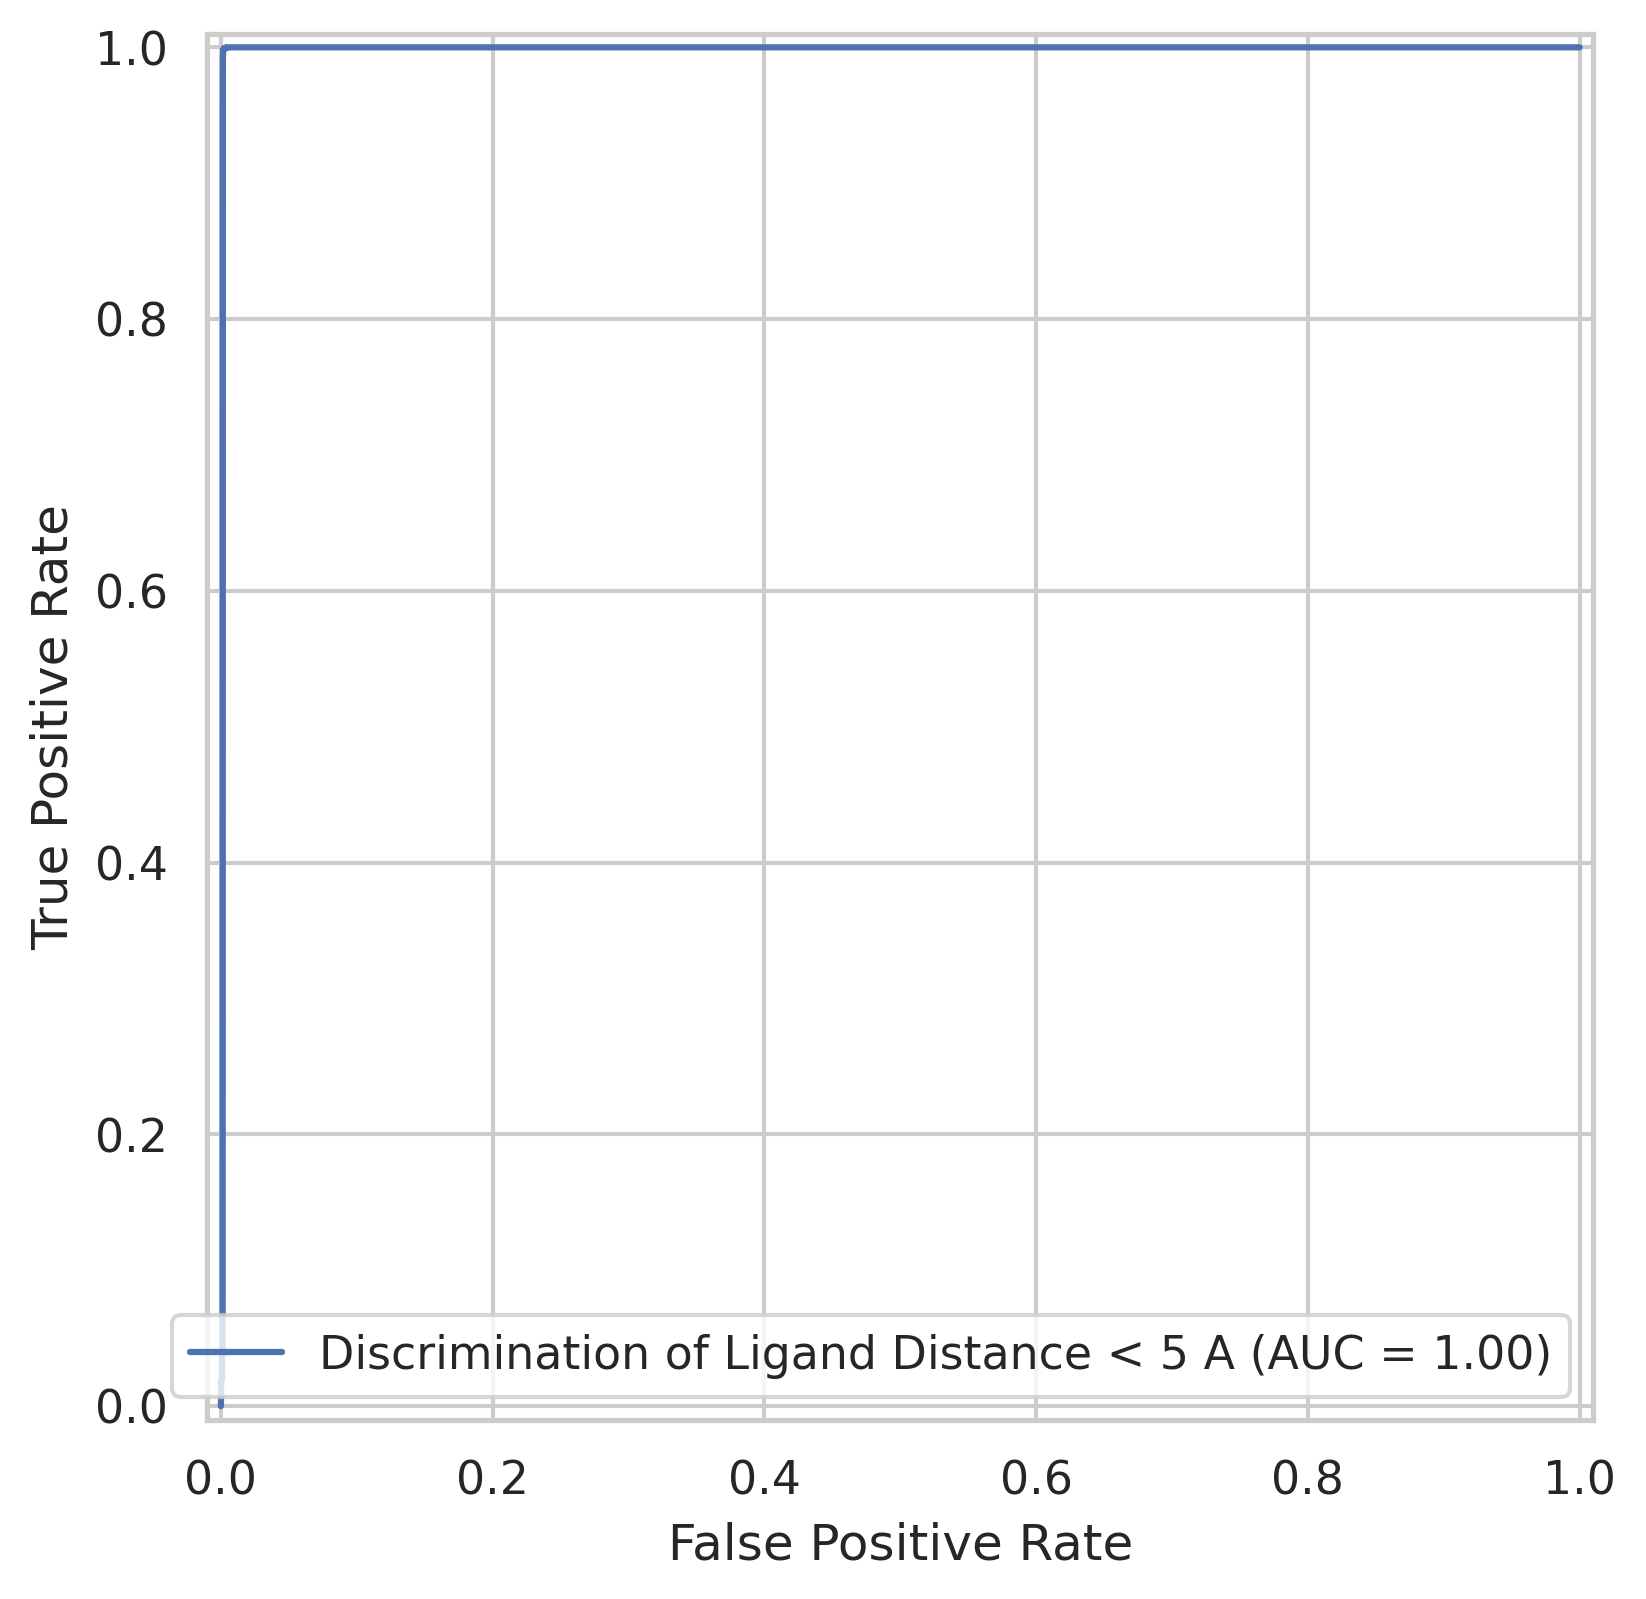

In [345]:
print("Positive results:", sum(df.ligand_dist < 5))
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
RocCurveDisplay.from_predictions(list(df.ligand_dist < 5), list(df.score), ax=ax, name="Discrimination of Ligand Distance < 5 A")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

Total expected: 7729


Text(0, 0.5, 'True Positive Rate')

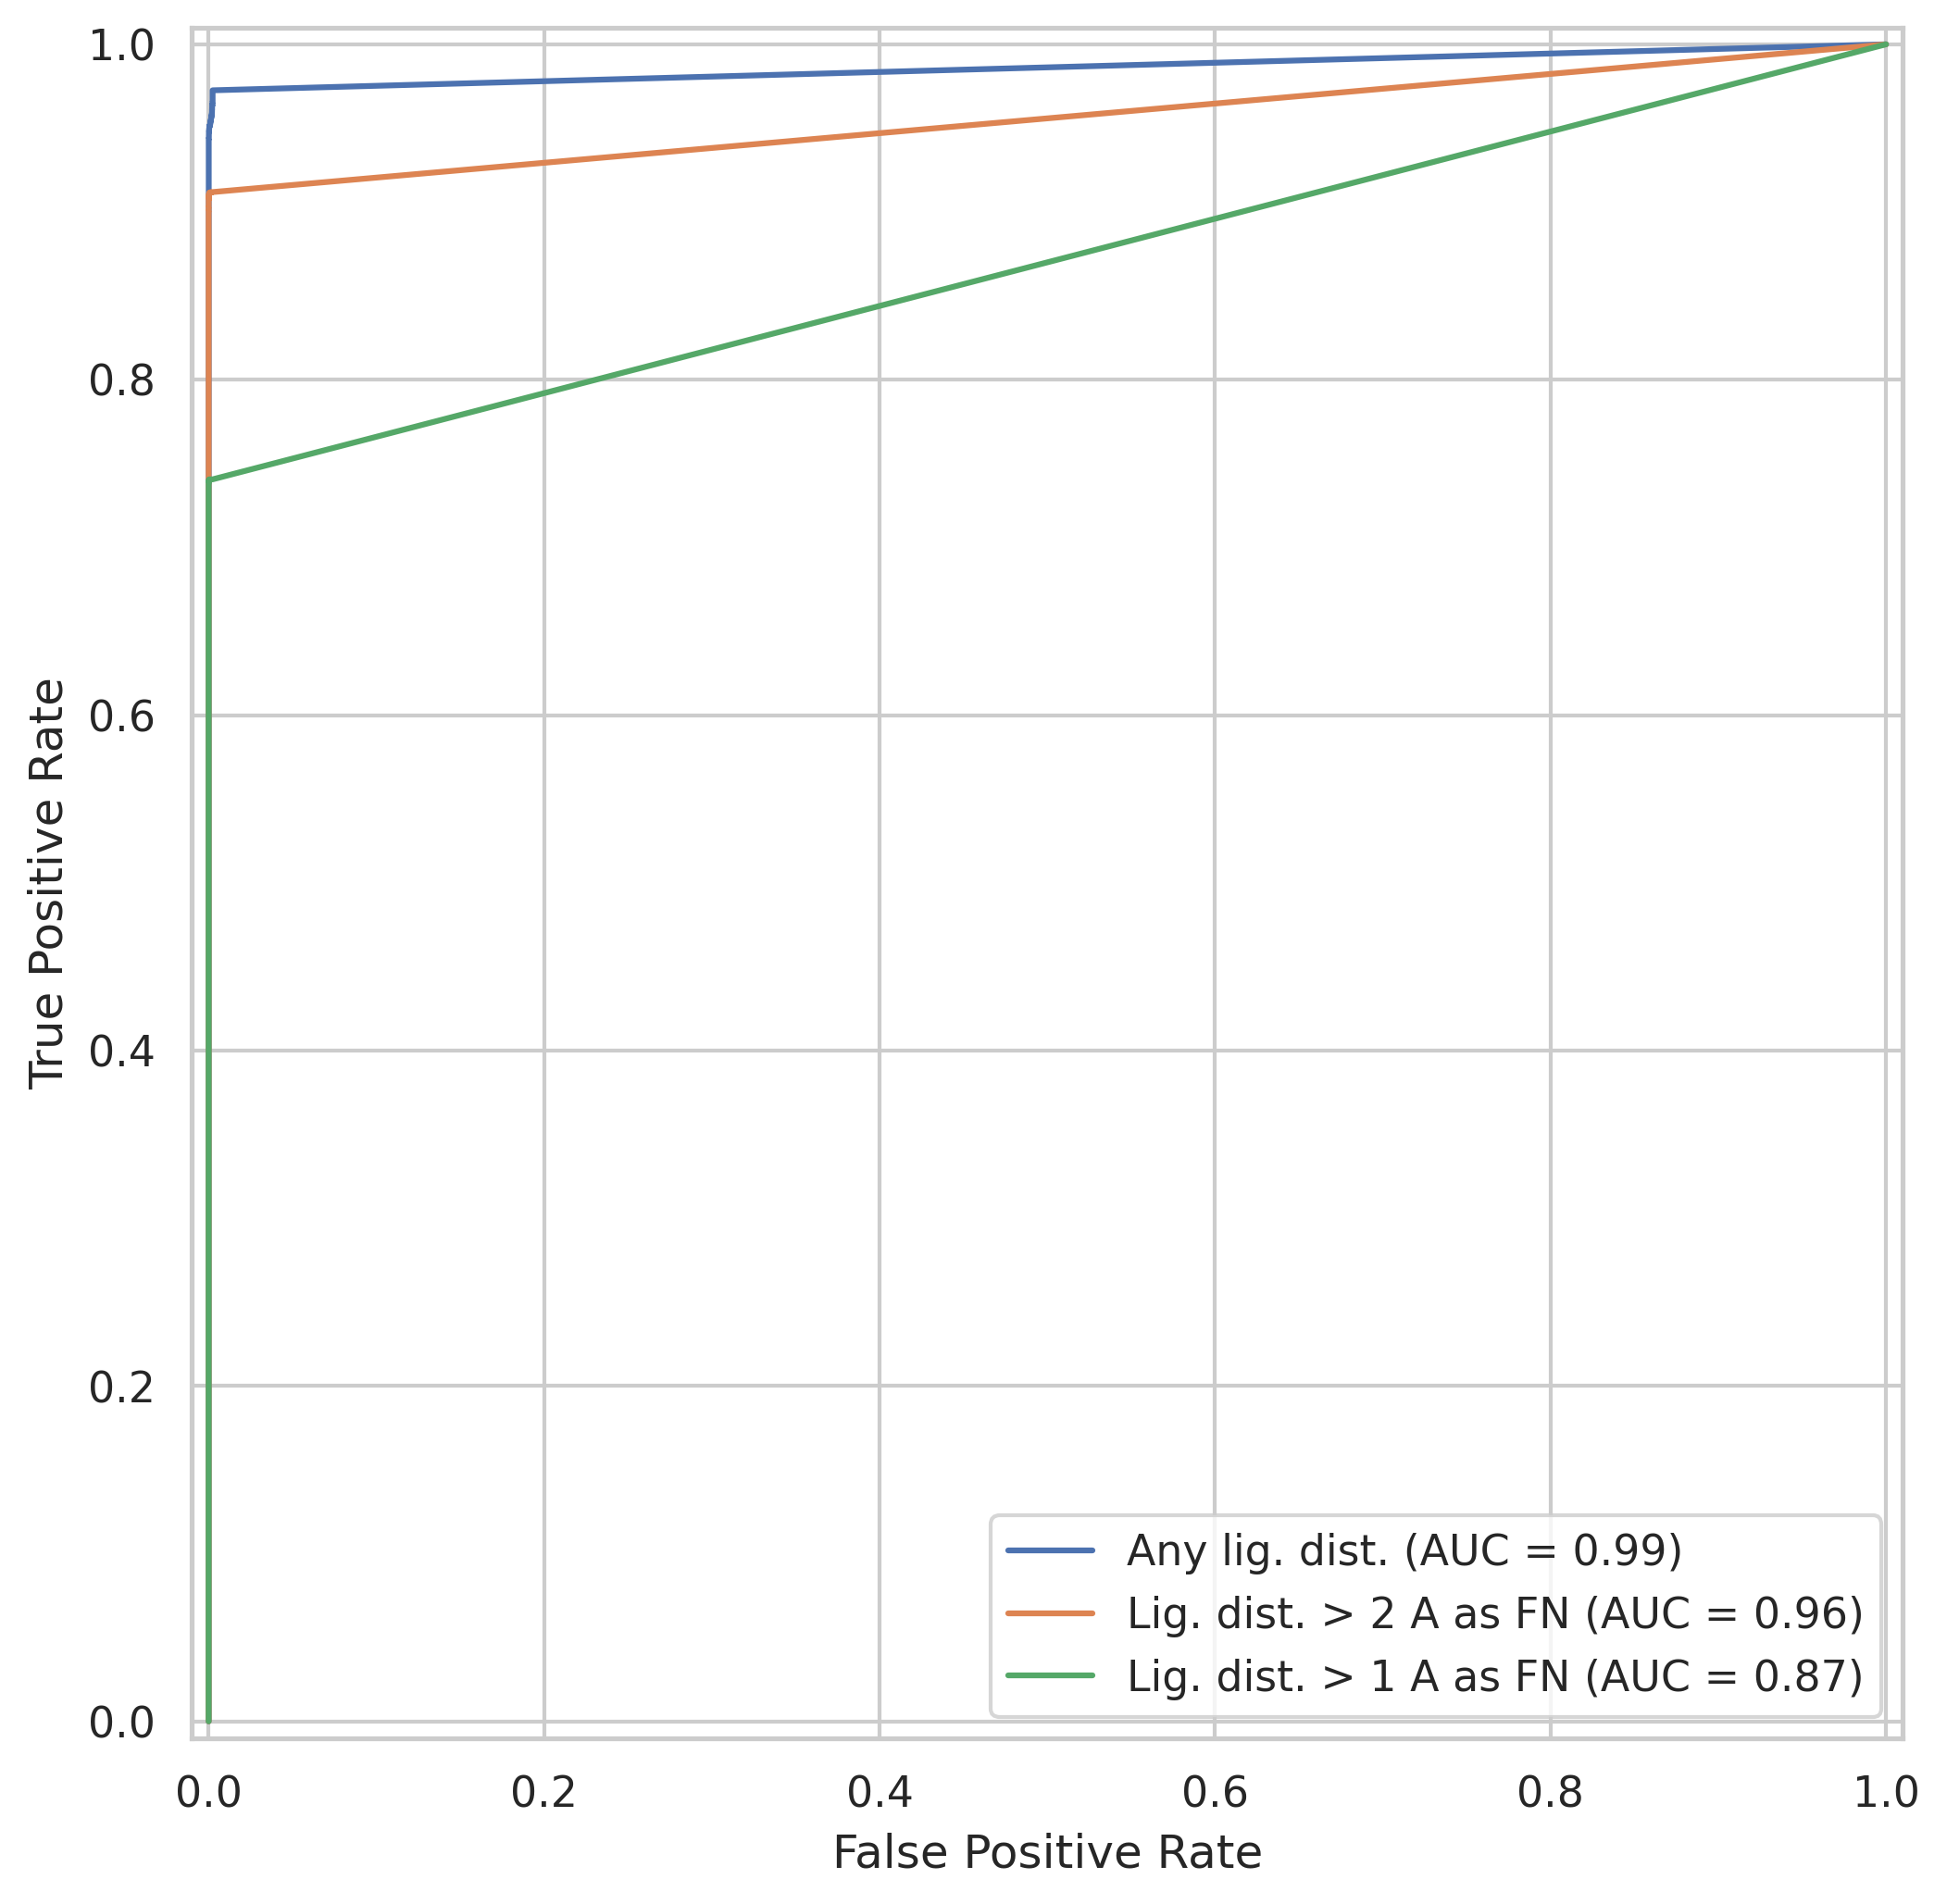

In [346]:
print('Total expected:', sum(df.label == 'positive'))
adjusted = [row.score if row.label == 'negative' or row.ligand_dist <= 99999 else -1 for i, row in df.iterrows()]
adjusted2 = [row.score if row.label == 'negative' or row.ligand_dist <= 2 else -1 for i, row in df.iterrows()]
adjusted1 = [row.score if row.label == 'negative' or row.ligand_dist <= 1 else -1 for i, row in df.iterrows()]
fig, ax = plt.subplots(figsize=(11, 8), dpi=300)
RocCurveDisplay.from_predictions(df.label == 'positive', adjusted, plot_chance_level=False, name='Any lig. dist.', ax=ax)
RocCurveDisplay.from_predictions(df.label == 'positive', adjusted2, plot_chance_level=False, name='Lig. dist. > 2 A as FN', ax=ax)
RocCurveDisplay.from_predictions(df.label == 'positive', adjusted1, plot_chance_level=False, name='Lig. dist. > 1 A as FN',  ax=ax)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Text(48.74999999999997, 0.5, 'True')

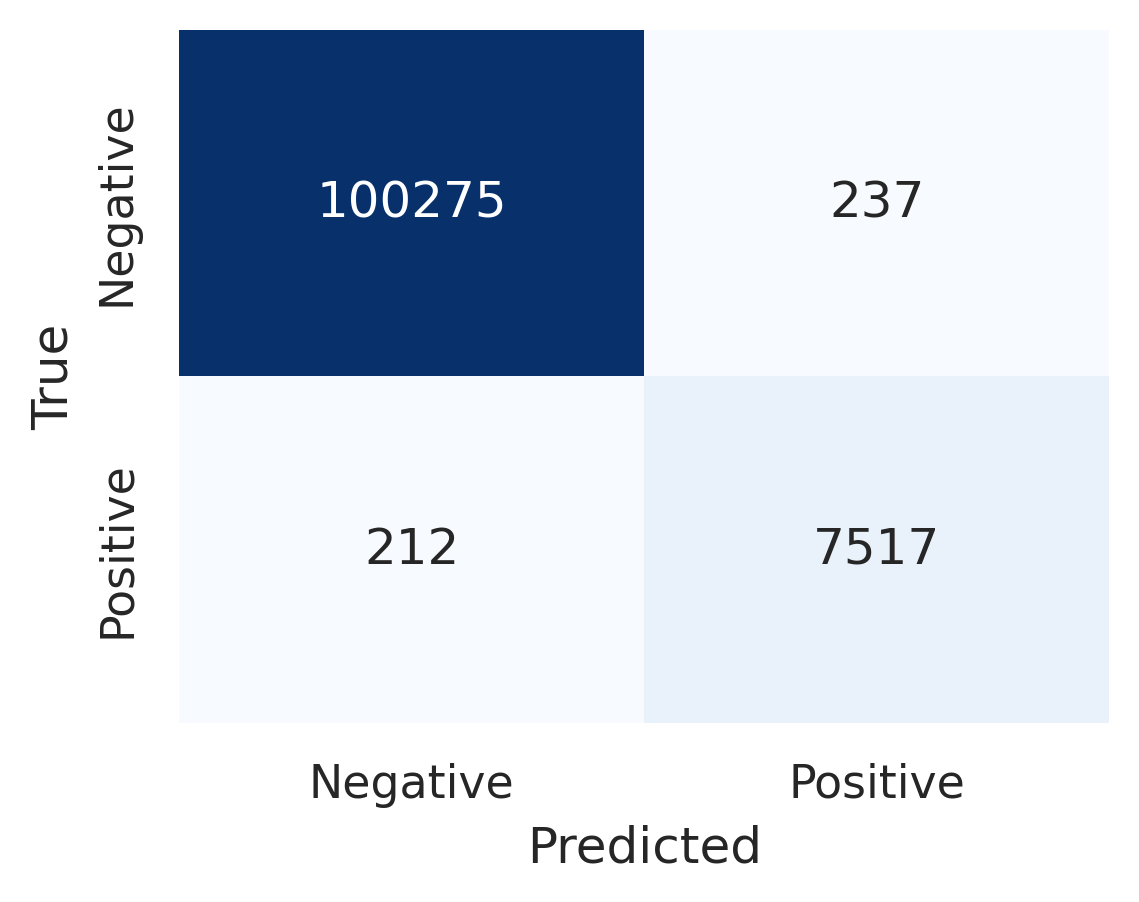

In [347]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
cm = confusion_matrix(df.label == 'positive', df.score > 0)
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], fmt='d', ax=ax)
plt.xlabel("Predicted")
plt.ylabel("True")